# 선형회귀

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 단순선형회귀 모델 만들기

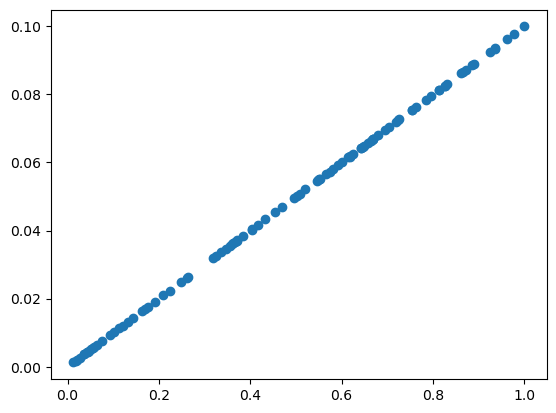

In [3]:
X = np.random.rand(100)
y = 0.2 * X * 0.5

plt.scatter(X,y)

In [4]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [5]:
# 경사하강법 y=wX+b, w결정
w = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learnig_rate = 0.5 # 임의 값

Epoch 0, w : 0.3667, Error : 0.7291


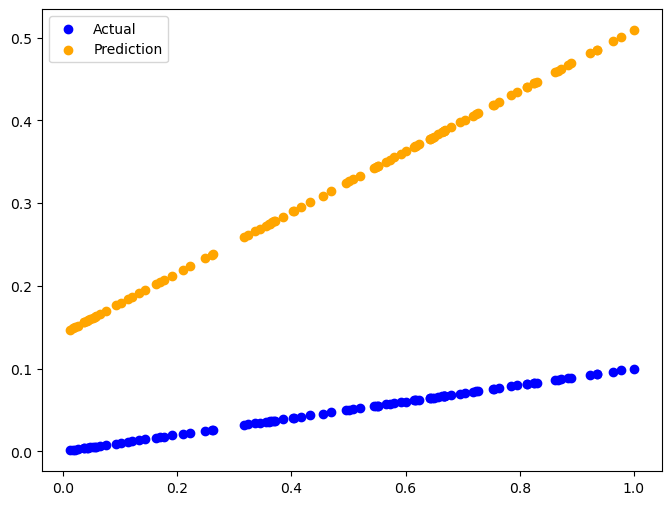

Epoch 10, w : 0.2091, Error : 0.0280


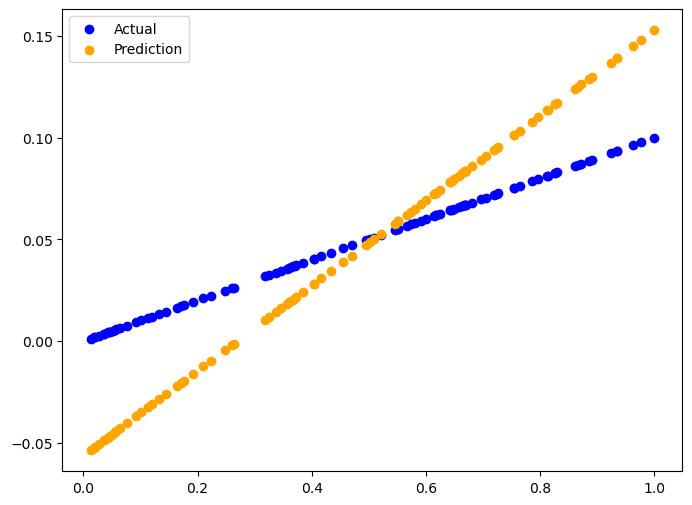

Epoch 20, w : 0.1779, Error : 0.0200


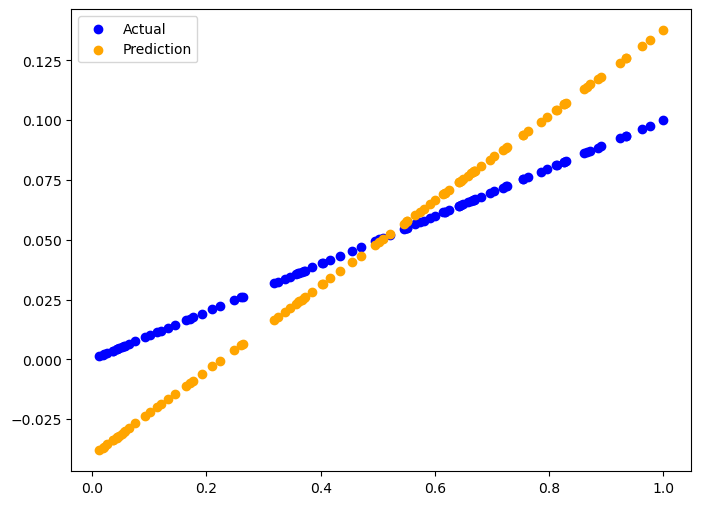

Epoch 30, w : 0.1556, Error : 0.0143


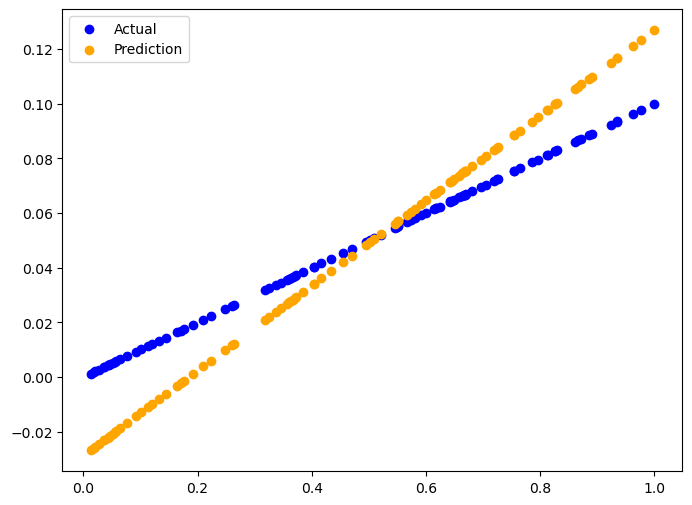

Epoch 40, w : 0.1397, Error : 0.0102


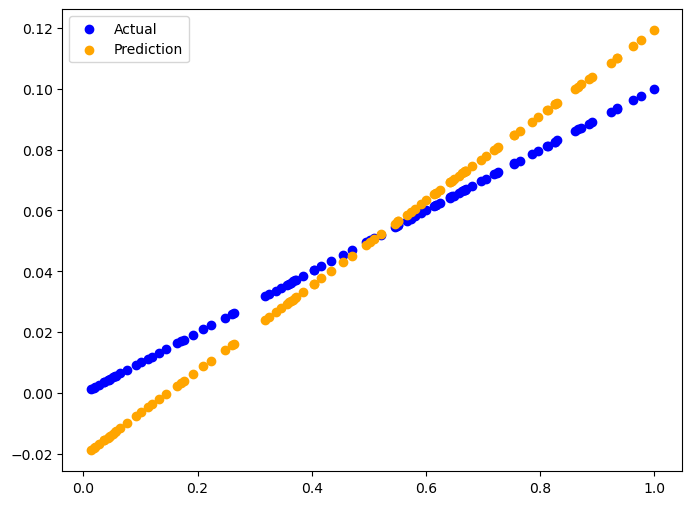

Epoch 50, w : 0.1284, Error : 0.0073


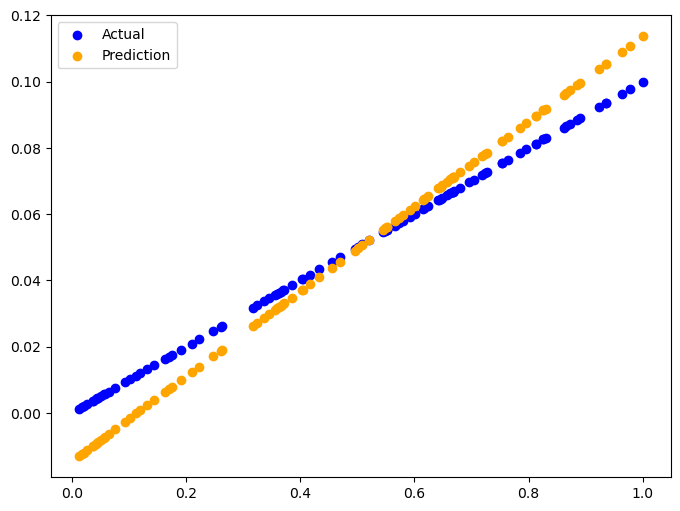

Epoch 60, w : 0.1203, Error : 0.0052


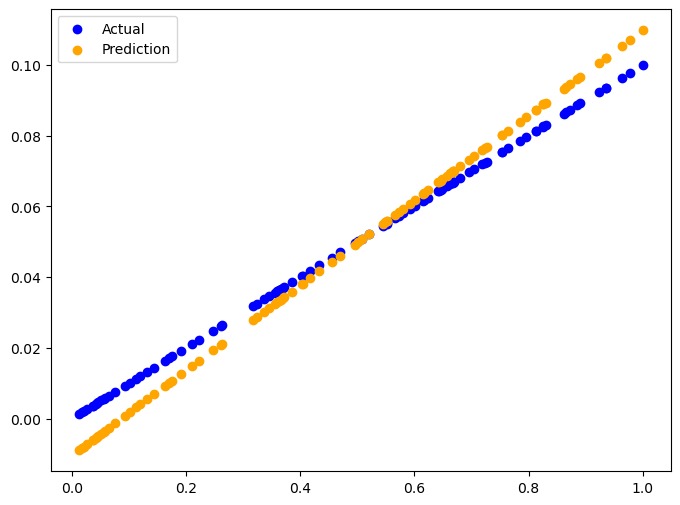

Epoch 70, w : 0.1145, Error : 0.0037


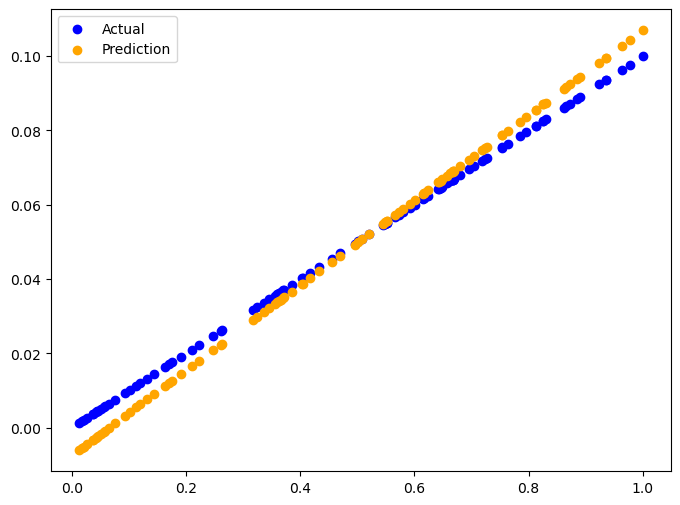

Epoch 80, w : 0.1103, Error : 0.0026


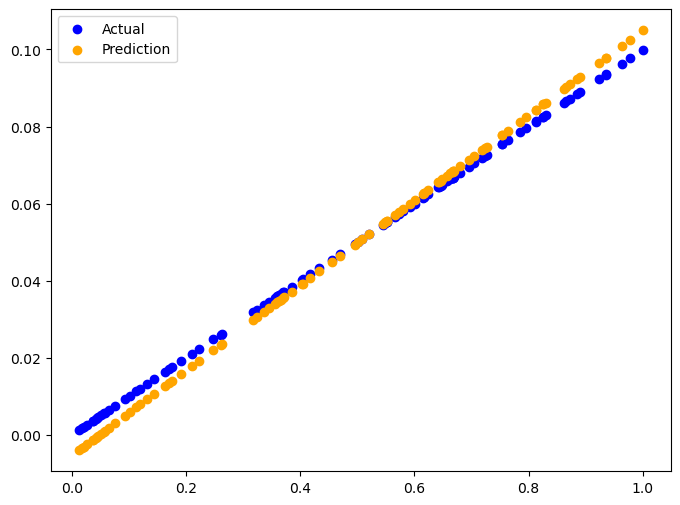

Epoch 90, w : 0.1074, Error : 0.0019


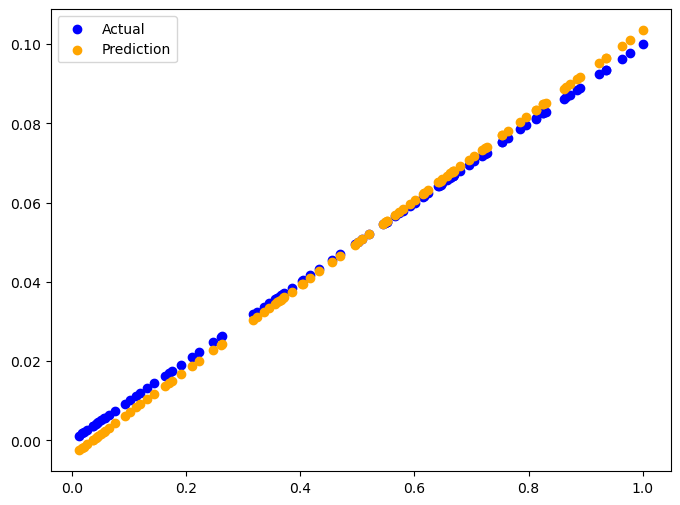

In [6]:
for epoch in range(100):
    y_pred = w * X + b
    error = np.abs(y_pred - y).mean()
    if error < 0.001 : 
        break
    w_descent = learnig_rate * ((y_pred - y)*X).mean()
    b_descent = learnig_rate * ((y_pred - y).mean())
    w = w - w_descent
    b = b - b_descent
    
    if epoch%10 == 0 :
        print(f'Epoch {epoch}, w : {w:.4f}, Error : {error:.4f}')
        y_pred = w*X+b
        plt_prediction(y_pred, y)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [8]:
bostonDf = pd.read_csv('./data/boston.csv')
bostonDf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [9]:
X = bostonDf.drop('target', axis=1).values
y = bostonDf['target'].values
bostonDf.shape

(506, 14)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [11]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [12]:
# 결정계수 
r2_score(y_test, y_pred)

np.float64(0.7572263323138934)

In [13]:
# 회귀식 
# w1, w0
lr.intercept_, lr.coef_

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = w0 + w1*X1 + w2*X2 + ... + w13*X13

In [14]:
np.round(lr.intercept_,1), np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [15]:
pd.Series(data = np.round(lr.coef_,1), index=bostonDf.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error')
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [20]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [21]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차는 작고(4.15 > 5.82), 결정계수는 작아진 결과